In [41]:
# import required libraries for dataframe and visualization

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
# Reading the data on which analysis needs to be done

retail = pd.read_csv('Online Retail.csv', sep=",", encoding="ISO-8859-1", header=0)
retail.head()

ï»¿InvoiceNo StockCode                          Description  Quantity  \
0       536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1       536365     71053                  WHITE METAL LANTERN         6   
2       536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3       536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4       536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  1/12/2010 8:26       2.55     17850.0  United Kingdom  
1  1/12/2010 8:26       3.39     17850.0  United Kingdom  
2  1/12/2010 8:26       2.75     17850.0  United Kingdom  
3  1/12/2010 8:26       3.39     17850.0  United Kingdom  
4  1/12/2010 8:26       3.39     17850.0  United Kingdom

In [42]:
retail = retail.rename({'ï»¿InvoiceNo':'InvoiceNo'}, axis='columns')

In [43]:
# shape of df

retail.shape

(541909, 8)

In [44]:
# df info

retail.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [45]:
# df description

retail.describe()

Quantity      UnitPrice     CustomerID
count  541909.000000  541909.000000  406829.000000
mean        9.552250       4.611114   15287.690570
std       218.081158      96.759853    1713.600303
min    -80995.000000  -11062.060000   12346.000000
25%         1.000000       1.250000   13953.000000
50%         3.000000       2.080000   15152.000000
75%        10.000000       4.130000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [46]:
# Calculating the Missing Values % contribution in DF

df_null = round(100*(retail.isnull().sum())/len(retail), 2)
df_null

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     24.93
Country         0.00
dtype: float64

In [47]:
# Droping rows having missing values

retail = retail.dropna()
retail.shape

(406829, 8)

In [48]:
# Changing the datatype of Customer Id as per Business understanding

retail['CustomerID'] = retail['CustomerID'].astype(str)

In [49]:
# New Attribute : Monetary

retail['Amount'] = retail['Quantity']*retail['UnitPrice']
rfm_m = retail.groupby('CustomerID')['Amount'].sum()
rfm_m = rfm_m.reset_index()
rfm_m.head()

CustomerID   Amount
0    12346.0     0.00
1    12347.0  4310.00
2    12348.0  1797.24
3    12349.0  1757.55
4    12350.0   334.40

In [50]:
# New Attribute : Frequency

rfm_f = retail.groupby('CustomerID')['InvoiceNo'].count()
rfm_f = rfm_f.reset_index()
rfm_f.columns =  ['CustomerID', 'customerID']
rfm_f

CustomerID  customerID
0       12346.0           2
1       12347.0         182
2       12348.0          31
3       12349.0          73
4       12350.0          17
...         ...         ...
4367    18280.0          10
4368    18281.0           7
4369    18282.0          13
4370    18283.0         756
4371    18287.0          70

[4372 rows x 2 columns]

In [51]:
# Merging the two dfs

rfm = pd.merge(rfm_m, rfm_f, on='CustomerID', how='inner')
rfm.head()

CustomerID   Amount  customerID
0    12346.0     0.00           2
1    12347.0  4310.00         182
2    12348.0  1797.24          31
3    12349.0  1757.55          73
4    12350.0   334.40          17

In [52]:
# New Attribute : Recency

# Convert to datetime to proper datatype

retail['InvoiceDate'] = pd.to_datetime(retail['InvoiceDate'],format='%d/%m/%Y %H:%M')
# Compute the maximum date to know the last transaction date

max_date = max(retail['InvoiceDate'])
max_date

Timestamp('2011-12-09 12:50:00')

In [53]:
# Compute the difference between max date and transaction date

retail['Diff'] = max_date - retail['InvoiceDate']
retail.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice CustomerID         Country  Amount  \
0 2010-12-01 08:26:00       2.55    17850.0  United Kingdom   15.30   
1 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   20.34   
2 2010-12-01 08:26:00       2.75    17850.0  United Kingdom   22.00   
3 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   20.34   
4 2010-12-01 08:26:00       3.39    17850.0  United Kingdom   20.34   

               Diff  
0 373 days 04:24:00  
1 373 days 04:24:00  
2 373 days 04:24:00  
3 373 days 04:24:00  
4 373 days 04:24:00

In [54]:
# Compute last transaction date to get the recency of customers

rfm_p = retail.groupby('CustomerID')['Diff'].min()
rfm_p = rfm_p.reset_index()
rfm_p.head(20)

CustomerID              Diff
0     12346.0 325 days 02:33:00
1     12347.0   1 days 20:58:00
2     12348.0  74 days 23:37:00
3     12349.0  18 days 02:59:00
4     12350.0 309 days 20:49:00
5     12352.0  35 days 22:13:00
6     12353.0 203 days 19:03:00
7     12354.0 231 days 23:39:00
8     12355.0 213 days 23:01:00
9     12356.0  22 days 04:10:00
10    12357.0  32 days 20:43:00
11    12358.0   1 days 02:24:00
12    12359.0   7 days 01:29:00
13    12360.0  51 days 21:28:00
14    12361.0 286 days 22:59:00
15    12362.0   2 days 21:10:00
16    12363.0 109 days 02:32:00
17    12364.0   7 days 02:28:00
18    12365.0 290 days 22:46:00
19    12367.0   3 days 20:02:00

In [55]:
# Extract number of days only

rfm_p['Diff'] = rfm_p['Diff'].dt.days
rfm_p.head()

CustomerID  Diff
0    12346.0   325
1    12347.0     1
2    12348.0    74
3    12349.0    18
4    12350.0   309

In [56]:
# Merge tha dataframes to get the final RFM dataframe

rfm = pd.merge(rfm, rfm_p, on='CustomerID', how='inner')
rfm.columns = ['CustomerID', 'Amount', 'Frequency', 'Recency']
rfm.head(20)

CustomerID   Amount  Frequency  Recency
0     12346.0     0.00          2      325
1     12347.0  4310.00        182        1
2     12348.0  1797.24         31       74
3     12349.0  1757.55         73       18
4     12350.0   334.40         17      309
5     12352.0  1545.41         95       35
6     12353.0    89.00          4      203
7     12354.0  1079.40         58      231
8     12355.0   459.40         13      213
9     12356.0  2811.43         59       22
10    12357.0  6207.67        131       32
11    12358.0  1168.06         19        1
12    12359.0  6245.53        254        7
13    12360.0  2662.06        129       51
14    12361.0   189.90         10      286
15    12362.0  5154.58        274        2
16    12363.0   552.00         23      109
17    12364.0  1313.10         85        7
18    12365.0   320.69         23      290
19    12367.0   168.90         11        3

Text(0.5, 0, 'Attributes')

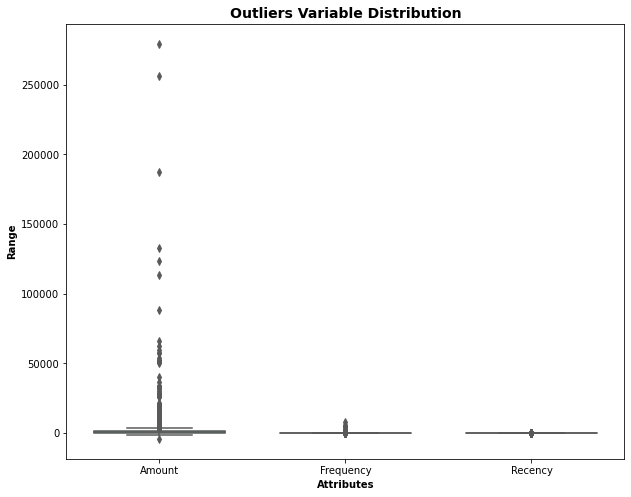

In [57]:
# Outlier Analysis of Amount Frequency and Recency

attributes = ['Amount','Frequency','Recency']
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = rfm[attributes], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attributes", fontweight = 'bold')

In [58]:
# Removing (statistical) outliers for Amount
Q1 = rfm.Amount.quantile(0.05)
Q3 = rfm.Amount.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Amount >= Q1 - 1.5*IQR) & (rfm.Amount <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Recency
Q1 = rfm.Recency.quantile(0.05)
Q3 = rfm.Recency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Recency >= Q1 - 1.5*IQR) & (rfm.Recency <= Q3 + 1.5*IQR)]

# Removing (statistical) outliers for Frequency
Q1 = rfm.Frequency.quantile(0.05)
Q3 = rfm.Frequency.quantile(0.95)
IQR = Q3 - Q1
rfm = rfm[(rfm.Frequency >= Q1 - 1.5*IQR) & (rfm.Frequency <= Q3 + 1.5*IQR)]

In [59]:
# Rescaling the attributes

rfm_df = rfm[['Amount', 'Frequency', 'Recency']]

# Instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4293, 3)

In [60]:
# k-means with some arbitrary k

kmeans = KMeans(n_clusters=4, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=4)

In [61]:
kmeans.labels_

array([0, 1, 2, ..., 0, 2, 2])

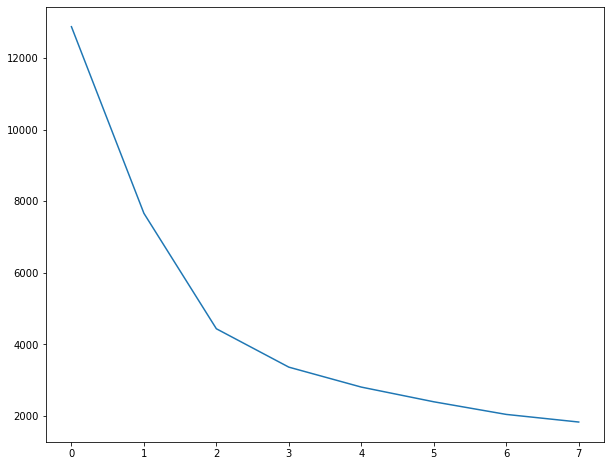

In [62]:
# Elbow-curve/SSD
ssd = []
range_n_clusters = [1,2, 3, 4, 5, 6, 7, 8]
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
plt.plot(ssd)


In [63]:
# Silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))
    

For n_clusters=2, the silhouette score is 0.541842117113117
For n_clusters=3, the silhouette score is 0.5084896296141937
For n_clusters=4, the silhouette score is 0.48040599663774697
For n_clusters=5, the silhouette score is 0.4666087666845323
For n_clusters=6, the silhouette score is 0.41783202669071257
For n_clusters=7, the silhouette score is 0.4159315431758116
For n_clusters=8, the silhouette score is 0.40383860761219526


In [64]:
# Final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [65]:
 kmeans.labels_

array([0, 2, 1, ..., 0, 1, 1])

In [66]:
# assign the label
rfm['Cluster_Id'] = kmeans.labels_
rfm.head()

CustomerID   Amount  Frequency  Recency  Cluster_Id
0    12346.0     0.00          2      325           0
1    12347.0  4310.00        182        1           2
2    12348.0  1797.24         31       74           1
3    12349.0  1757.55         73       18           1
4    12350.0   334.40         17      309           0

<AxesSubplot:xlabel='Cluster_Id', ylabel='Amount'>

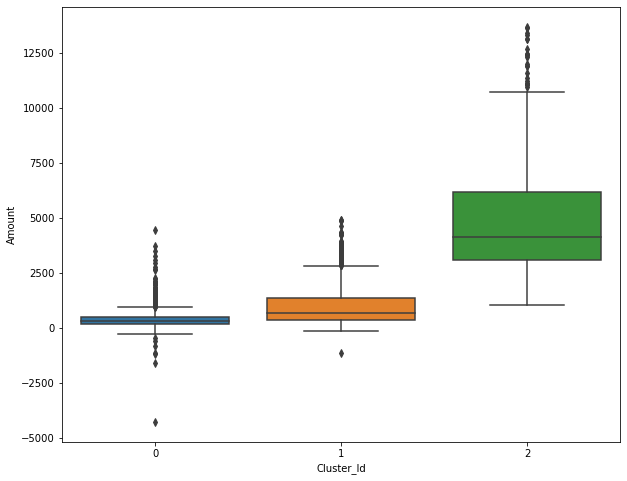

In [67]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Frequency'>

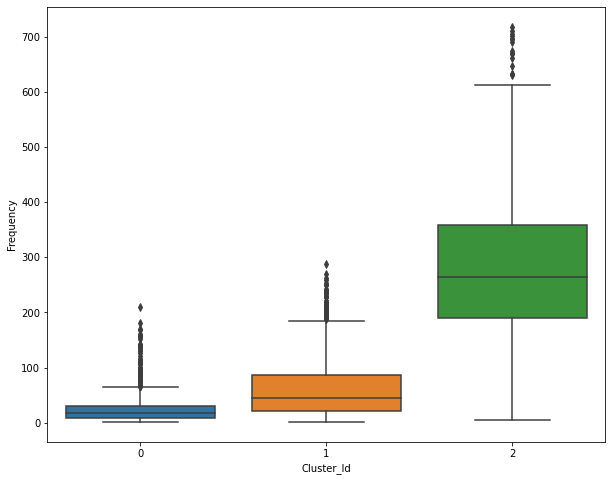

In [68]:
# Box plot to visualize Cluster Id vs Frequency

sns.boxplot(x='Cluster_Id', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Id', ylabel='Recency'>

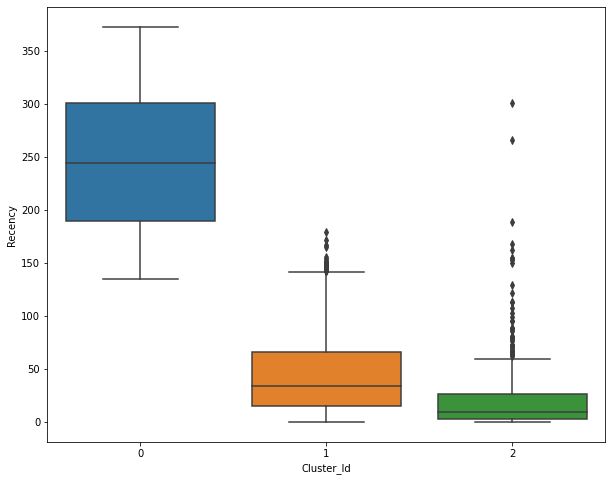

In [69]:
# Box plot to visualize Cluster Id vs Recency

sns.boxplot(x='Cluster_Id', y='Recency', data=rfm)

In [70]:
#Hierarchical Clustering

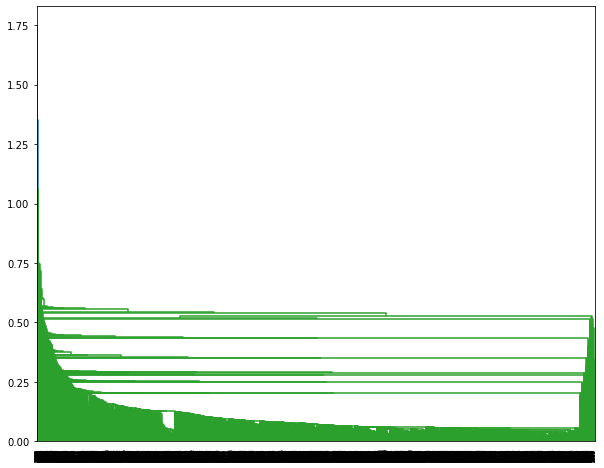

In [32]:
# Single linkage: 

mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

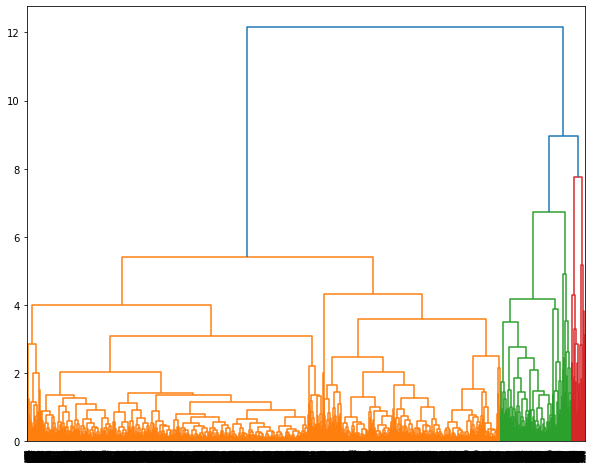

In [33]:
# Complete linkage

mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

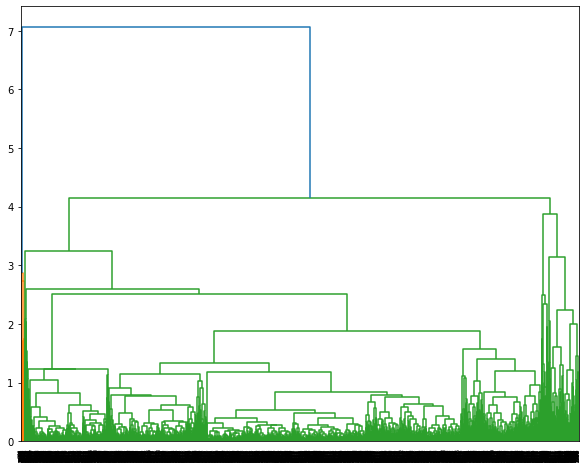

In [34]:
# Average linkage

mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

In [35]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 0, 0])

In [36]:
# Assign cluster labels

rfm['Cluster_Labels'] = cluster_labels
rfm.head()

CustomerID   Amount  Frequency  Recency  Cluster_Id  Cluster_Labels
0    12346.0     0.00          2      325           2               0
1    12347.0  4310.00        182        1           0               0
2    12348.0  1797.24         31       74           1               0
3    12349.0  1757.55         73       18           1               0
4    12350.0   334.40         17      309           2               0

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Amount'>

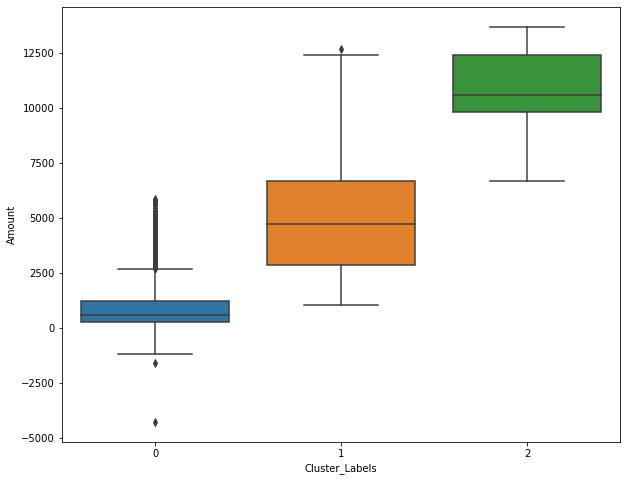

In [37]:
# Plot Cluster Id vs Amount

sns.boxplot(x='Cluster_Labels', y='Amount', data=rfm)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Frequency'>

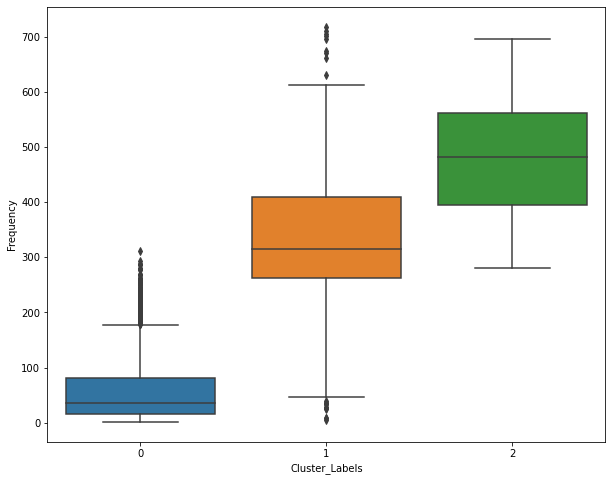

In [38]:
# Plot Cluster Id vs Frequency

sns.boxplot(x='Cluster_Labels', y='Frequency', data=rfm)

<AxesSubplot:xlabel='Cluster_Labels', ylabel='Recency'>

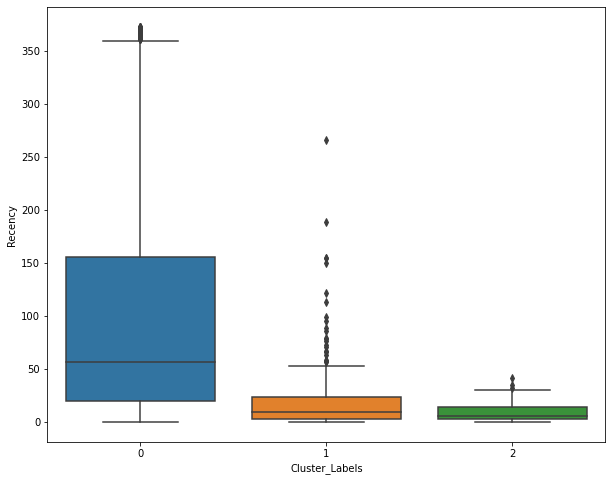

In [39]:
# Plot Cluster Id vs Recency

sns.boxplot(x='Cluster_Labels', y='Recency', data=rfm)